In [1]:
import pandas as pd
import numpy as np

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.preprocessing import OneHotEncoder

# Loading Data 

In [4]:
train_data = pd.read_csv('./train.csv')

In [5]:
orig_data = train_data.copy()

# Impute NANs 

In [6]:
for col in ["Cabin", "Ticket", "Embarked"]:
    train_data[col].fillna("None", inplace=True)

# Generate Features 

In [7]:
train_data["Deck"] = train_data["Cabin"].map( lambda x:x[0])

# One Hot Encoding 

In [8]:
enc_list = ["Name","Sex","Ticket","Cabin","Deck","Embarked"]
enc = {enc_list_item : OneHotEncoder().fit(train_data[enc_list_item].values.reshape(-1,1)) for enc_list_item in enc_list}
A = None
Encoded_features = []
for key in enc:
    B = enc[key].transform(train_data[key].values.reshape(-1,1))
    if A is None:
        A = B.todense().copy()
    else:
        A = np.hstack((A,B.todense()))
    Encoded_features += [f"{key}_{feature}" for cat in enc[key].categories_ for feature in cat]
A = np.hstack((train_data.drop(enc_list+["Survived"], axis=1).values, A))

In [9]:
All_features = train_data.drop(enc_list+["Survived"], axis=1).columns.tolist() + Encoded_features

# Splitting Data 

In [10]:
X = A
Y = train_data['Survived'].values

seed = 4711
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=test_size, random_state=seed)

# Fit XGBoost 

In [11]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Visualize Tree 

In [12]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


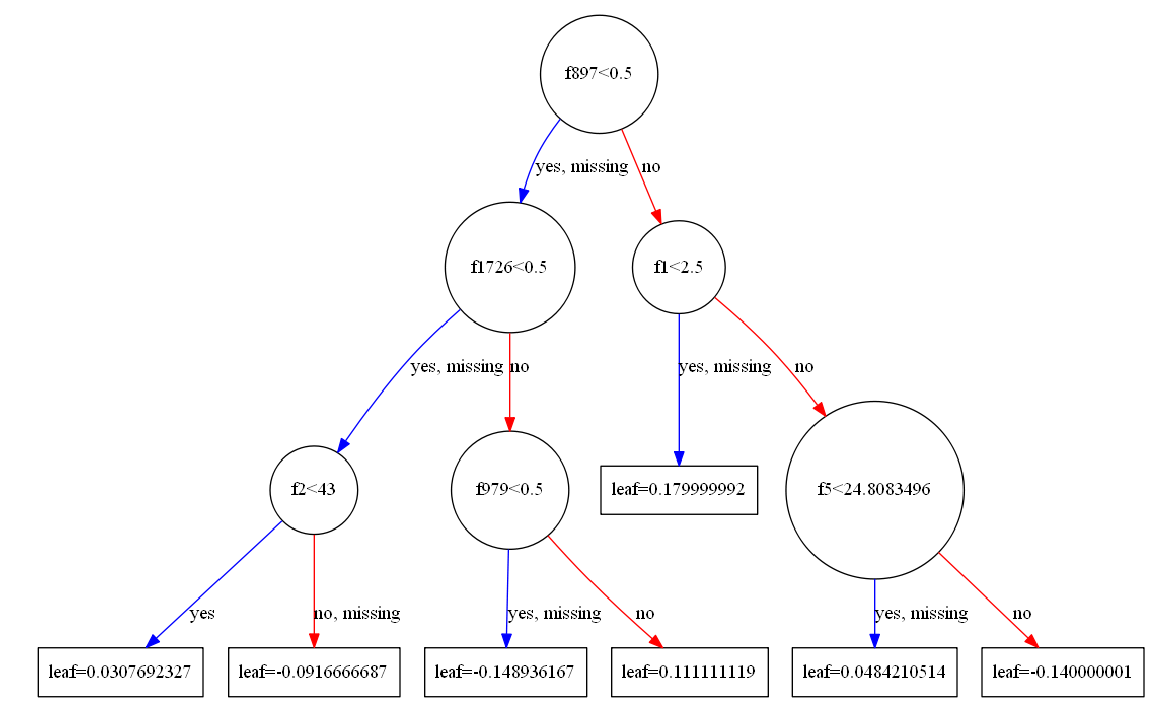

In [13]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1,figsize=(20,20))

plot_tree(model, ax=ax)
plt.show()

In [14]:
for i in [897,1726,1,2,979,5]:
    print(i,All_features[i])

897 Sex_female
1726 Cabin_None
1 Pclass
2 Age
979 Ticket_1601
5 Fare


# Making Prediction test set 

In [15]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [16]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.21%
